In [1]:
!gdown --id 196BS6Wq4gcL-JXWPFOryBidS9KC9CtJp
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

Downloading...
From: https://drive.google.com/uc?id=196BS6Wq4gcL-JXWPFOryBidS9KC9CtJp
To: /content/kaggle.json
100% 65.0/65.0 [00:00<00:00, 26.9kB/s]


In [2]:
!kaggle competitions download -c instacart-market-basket-analysis

  0% 0.00/804 [00:00<?, ?B/s]
100% 804/804 [00:00<00:00, 307kB/s]
  0% 0.00/795k [00:00<?, ?B/s]
100% 795k/795k [00:00<00:00, 52.8MB/s]
 77% 24.0M/31.3M [00:00<00:00, 75.7MB/s]
100% 31.3M/31.3M [00:00<00:00, 89.3MB/s]
  0% 0.00/1.87k [00:00<?, ?B/s]
100% 1.87k/1.87k [00:00<00:00, 2.01MB/s]
  0% 0.00/220k [00:00<?, ?B/s]
100% 220k/220k [00:00<00:00, 73.5MB/s]
 89% 139M/157M [00:01<00:00, 129MB/s]
100% 157M/157M [00:01<00:00, 120MB/s]
  0% 0.00/6.90M [00:00<?, ?B/s]
100% 6.90M/6.90M [00:00<00:00, 63.2MB/s]


In [3]:
!unzip orders.csv.zip
!unzip order_products__prior.csv.zip
!unzip order_products__train.csv.zip
!unzip aisles.csv.zip
!unzip departments.csv.zip
!unzip products.csv.zip

Archive:  orders.csv.zip
  inflating: orders.csv              
   creating: __MACOSX/
  inflating: __MACOSX/._orders.csv   
Archive:  order_products__prior.csv.zip
  inflating: order_products__prior.csv  
  inflating: __MACOSX/._order_products__prior.csv  
Archive:  order_products__train.csv.zip
  inflating: order_products__train.csv  
  inflating: __MACOSX/._order_products__train.csv  
Archive:  aisles.csv.zip
  inflating: aisles.csv              
  inflating: __MACOSX/._aisles.csv   
Archive:  departments.csv.zip
  inflating: departments.csv         
  inflating: __MACOSX/._departments.csv  
Archive:  products.csv.zip
  inflating: products.csv            
  inflating: __MACOSX/._products.csv  


In [1]:
import pandas as pd

order_df = pd.read_csv('orders.csv')
order_df

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [ ]:
order_df[order_df.eval_set == 'prior']

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421077,2558525,206209,prior,9,4,15,22.0
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0


In [2]:
order_pd_prior_df = pd.read_csv('order_products__prior.csv')
order_pd_prior_df

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [ ]:
order_pd_train_df = pd.read_csv('order_products__train.csv')
order_pd_train_df

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [ ]:
test_set = order_df[order_df['eval_set'] == 'test']
test_set

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
38,2774568,3,test,13,5,15,11.0
44,329954,4,test,6,3,12,30.0
53,1528013,6,test,4,3,16,22.0
96,1376945,11,test,8,6,11,8.0
102,1356845,12,test,6,1,20,30.0
...,...,...,...,...,...,...,...
3420918,2728930,206202,test,23,2,17,6.0
3420929,350108,206204,test,5,4,14,14.0
3421001,1043943,206206,test,68,0,20,0.0
3421018,2821651,206207,test,17,2,13,14.0


In [ ]:
#training set的user與testing set的user 下過的order數量
train_order = order_df[order_df.eval_set == 'train']
train_user = train_order.user_id
train_order = order_df[order_df.apply(lambda x: x.user_id in train_user, axis=1)]
train_order

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
83,1224907,10,prior,1,2,14,NaN
84,68288,10,prior,2,5,15,30.0
85,2115522,10,prior,3,3,19,12.0
86,83395,10,prior,4,3,15,14.0
87,1353310,10,prior,5,5,20,23.0
...,...,...,...,...,...,...,...
3420666,792593,206188,prior,4,5,12,30.0
3420667,1157735,206188,prior,5,4,13,20.0
3420668,1636473,206188,prior,6,2,9,30.0
3420669,847122,206188,prior,7,3,9,22.0


In [ ]:
#training set的user與testing set的user 下過的order數量
test_order = order_df[order_df.eval_set == 'test']
test_user = test_order.user_id
test_order = order_df[order_df.apply(lambda x: x.user_id in test_user, axis=1)]
test_order

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
558,2873174,38,prior,1,0,10,NaN
559,1308004,38,prior,2,4,11,30.0
560,1588002,38,prior,3,0,11,17.0
561,1691300,38,prior,4,6,12,20.0
562,1244041,38,prior,5,0,14,22.0
...,...,...,...,...,...,...,...
3420782,825502,206196,prior,1,6,14,NaN
3420783,233992,206196,prior,2,2,18,30.0
3420784,2197889,206196,prior,3,6,16,25.0
3420785,3342065,206196,prior,4,6,15,21.0


In [ ]:
train_order_size_dis = train_order.groupby('user_id').agg({'order_id': 'size'})
#train_order_size_dis.hist(color='red')
test_order_size_dis = test_order.groupby('user_id').agg({'order_id': 'size'})
#test_order_size_dis.hist(color='green')

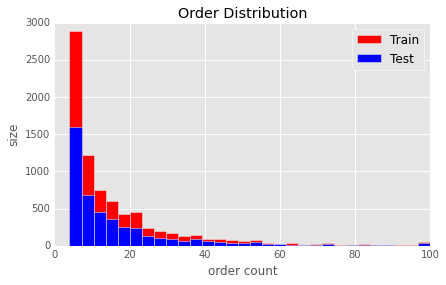

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

plt.hist(train_order_size_dis.order_id.values, label = 'Train', stacked=True, bins=30, color='red')
plt.hist(test_order_size_dis.order_id.values, label = 'Test', stacked=True, bins=30, color='blue')
plt.title('Order Distribution')
plt.xlabel('order count')
plt.ylabel('size')
plt.legend()
plt.show()

In [ ]:
order_df

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [3]:
order_df = pd.read_csv('orders.csv')
prior_orders = order_df[order_df.eval_set == 'prior'][['order_id', 'user_id']]

prior_products = pd.merge(prior_orders, order_pd_prior_df, on='order_id')
prior_products

,order_id,user_id,product_id,add_to_cart_order,reordered
0,2539329,1,196,1,0
1,2539329,1,14084,2,0
2,2539329,1,12427,3,0
3,2539329,1,26088,4,0
4,2539329,1,26405,5,0
...,...,...,...,...,...
32434484,2977660,206209,14197,5,1
32434485,2977660,206209,38730,6,0
32434486,2977660,206209,31477,7,0
32434487,2977660,206209,6567,8,0


In [ ]:
train_reordered_products = prior_products[prior_products.apply(lambda x: x.user_id in train_user, axis=1)]
test_reordered_products = prior_products[prior_products.apply(lambda x: x.user_id in test_user, axis=1)]

NameError: ignored

In [ ]:
test_reordered_products

,order_id,user_id,product_id,add_to_cart_order,reordered
4684,2873174,38,14947,1,0
4685,2873174,38,4781,2,0
4686,2873174,38,27509,3,0
4687,2873174,38,31343,4,0
4688,2873174,38,2086,5,0
...,...,...,...,...,...
32431535,3342065,206196,18027,25,0
32431536,3342065,206196,33195,26,0
32431537,3342065,206196,48057,27,0
32431538,3342065,206196,35951,28,0


In [ ]:
train_product_counts = train_reordered_products.groupby('product_id').agg({'reordered': 'sum'})
test_product_counts = test_reordered_products.groupby('product_id').agg({'reordered': 'sum'})

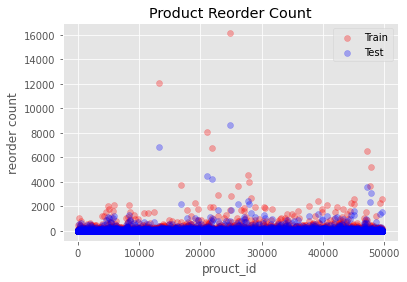

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

plt.scatter(train_product_counts.index, train_product_counts.values, label = 'Train', color='red', alpha=0.3)
plt.scatter(test_product_counts.index, test_product_counts.values, label = 'Test', color='blue', alpha=0.3)
plt.title('Product Reorder Count')
plt.xlabel('prouct_id')
plt.ylabel('reorder count')
plt.legend()
plt.show()

In [ ]:
train_product_counts = train_reordered_products.groupby('user_id').agg({'reordered': 'sum'})
test_product_counts = test_reordered_products.groupby('user_id').agg({'reordered': 'sum'})

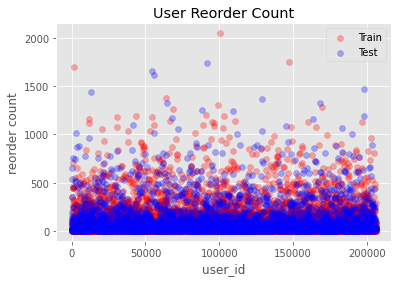

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

plt.scatter(train_product_counts.index, train_product_counts.values, label = 'Train', color='red', alpha=0.3)
plt.scatter(test_product_counts.index, test_product_counts.values, label = 'Test', color='blue', alpha=0.3)
plt.title('User Reorder Count')
plt.xlabel('user_id')
plt.ylabel('reorder count')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
!cp drive/My\ Drive/eCloudvalley/product_embeddings.pkl /content
product_embeddings = pd.read_pickle('product_embeddings.pkl')

In [ ]:
X = product_embeddings.iloc[:10000, :-1].values

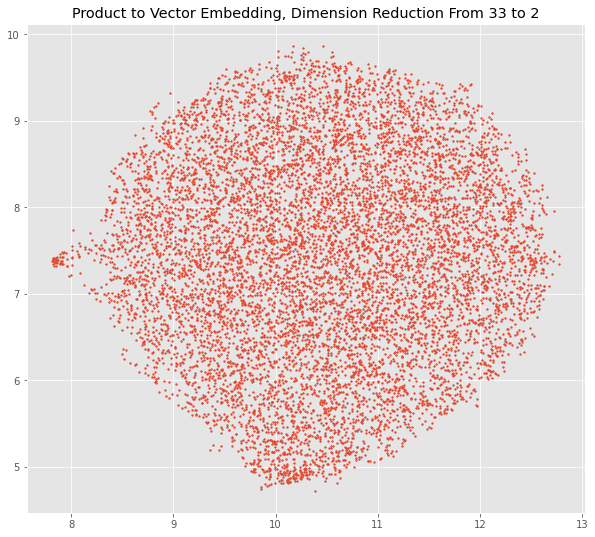

In [ ]:
import umap
import matplotlib.pyplot as plt
%matplotlib inline

cluster_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0, n_components=2, random_state=42).fit_transform(X)

plt.style.use('ggplot')
plt.figure(figsize=(10,9))
plt.title('Product to Vector Embedding, Dimension Reduction From 32 to 2')
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')

In [ ]:
import pandas as pd

sub = pd.read_csv('sub_002.csv')


In [ ]:
from collections import defaultdict

pro_dict = defaultdict(int)

for ind in sub.index:
  prods = sub['products'][ind].split(' ')
  for prod in prods:
    if prod != 'None':
      pro_dict[prod] += 1

In [ ]:
sales_pred

,product_id,Reorder Count
0,13107,20
1,21463,105
2,38777,189
3,16083,555
4,39475,670
...,...,...
24537,13635,1
24538,49412,1
24539,25771,1
24540,36377,1


In [ ]:
sales_pred = pd.DataFrame.from_dict(pro_dict, orient='index').reset_index()
sales_pred.columns=['product_id', 'Reorder Count']
sales_pred = sales_pred.astype({'product_id': 'int64'})
sales_pred.dtypes

product_id       int64
Reorder Count    int64
dtype: object

In [ ]:
products = pd.read_csv('products.csv')
products_reorder = pd.merge(products, sales_pred, on='product_id', how='left').fillna(0)
products_reorder = products_reorder.iloc[:, [0, 1, -1]].sort_values(by='Reorder Count')
products_reorder

,product_id,product_name,Reorder Count
49687,49688,Fresh Foaming Cleanser,0.0
18281,18282,Flavor Blasted Xtra Cheddar + Pretzal Baked Sn...,0.0
35743,35744,Genmai Miso Aged and Fermented Soy and Brown Rice,0.0
35744,35745,Broccoli Raisin Salad,0.0
18278,18279,Apple Strawberry Sauce,0.0
...,...,...,...
47625,47626,Large Lemon,7435.0
21136,21137,Organic Strawberries,9598.0
21902,21903,Organic Baby Spinach,9681.0
13175,13176,Bag of Organic Bananas,14353.0


In [ ]:
products_reorder[products_reorder['Reorder Count'] == 0]

,product_id,product_name,Reorder Count
49687,49688,Fresh Foaming Cleanser,0.0
18281,18282,Flavor Blasted Xtra Cheddar + Pretzal Baked Sn...,0.0
35743,35744,Genmai Miso Aged and Fermented Soy and Brown Rice,0.0
35744,35745,Broccoli Raisin Salad,0.0
18278,18279,Apple Strawberry Sauce,0.0
...,...,...,...
42242,42243,Whole Grain Mustard,0.0
9628,9629,Blackberry Flavored Ginger Ale,0.0
43948,43949,Lite Half Salt White Popcorn,0.0
9611,9612,"Rice, Long Grain & Wild, Herb & Butter Flavor",0.0


In [ ]:
products_reorder[products_reorder['Reorder Count'] > 1000]

,product_id,product_name,Reorder Count
7780,7781,Organic Sticks Low Moisture Part Skim Mozzarel...,1004.0
9075,9076,Blueberries,1009.0
5478,5479,Italian Sparkling Mineral Water,1017.0
38738,38739,Hass Avocado,1027.0
3956,3957,100% Raw Coconut Water,1037.0
...,...,...,...
47625,47626,Large Lemon,7435.0
21136,21137,Organic Strawberries,9598.0
21902,21903,Organic Baby Spinach,9681.0
13175,13176,Bag of Organic Bananas,14353.0


User Embedding

In [4]:
product_user = prior_products.groupby('product_id').agg(user_seq = ('user_id', lambda x: list(x)))
product_user

,user_seq
product_id,
1,"[138, 138, 709, 764, 764, 777, 825, 910, 1052,..."
2,"[5652, 5652, 7855, 10252, 14745, 15149, 20700,..."
3,"[1298, 1298, 1298, 1298, 1298, 1298, 1298, 456..."
4,"[1677, 2277, 2358, 2358, 2358, 4252, 4567, 456..."
5,"[58825, 58825, 102105, 102105, 151922, 160220,..."
...,...
49684,"[15858, 33465, 55524, 79791, 154576, 169083, 1..."
49685,"[7564, 19507, 28492, 32031, 32031, 32591, 3853..."
49686,"[10660, 10660, 10660, 10660, 16163, 16163, 161..."


In [5]:
def ListInttoStr(x):
  for i in range(len(x)):
    x[i] = str(x[i])
  return x

In [6]:
product_user = product_user.reset_index()
product_user = product_user.user_seq.apply((lambda x: ListInttoStr(x)))

In [7]:
train = product_user[:3000]

In [8]:
from gensim.models import Word2Vec 

# train word2vec model
model = Word2Vec(window = 6, sg = 1, hs = 0,
                 negative = 10, # for negative sampling
                 alpha=0.5, min_alpha=0.1,
                 seed = 2020, min_count=1, workers=2, size=32)

model.build_vocab(train, progress_per=200)

model.train(train, total_examples = model.corpus_count, start_alpha=0.5, end_alpha=0.1, epochs=20, report_delay=1, compute_loss=True)

print(model)
# extract all vectors
X = model[model.wv.vocab]
print(X.shape)

Word2Vec(vocab=168982, size=32, alpha=0.5)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


(168982, 32)


In [9]:
X[:3000]

array([[ 0.15176225, -0.04716784,  0.02941948, ...,  2.2272973 ,
        -0.24742556,  1.2838656 ],
       [ 3.4109337 ,  5.40731   ,  1.3634373 , ..., -0.6965312 ,
         4.7004757 ,  2.935556  ],
       [-0.05358136, -0.5405279 ,  0.47974408, ...,  2.0431814 ,
        -0.16331284,  0.7767298 ],
       ...,
       [ 1.2708104 , -2.8075943 , -4.7421694 , ...,  9.191311  ,
        -1.8376598 ,  3.210405  ],
       [ 3.0014074 ,  0.88216835,  3.4763439 , ..., 12.235594  ,
        -4.7623067 ,  2.2416995 ],
       [-0.8024669 , -0.97108763,  1.7276762 , ...,  6.9187226 ,
        -2.4004269 ,  0.74912715]], dtype=float32)

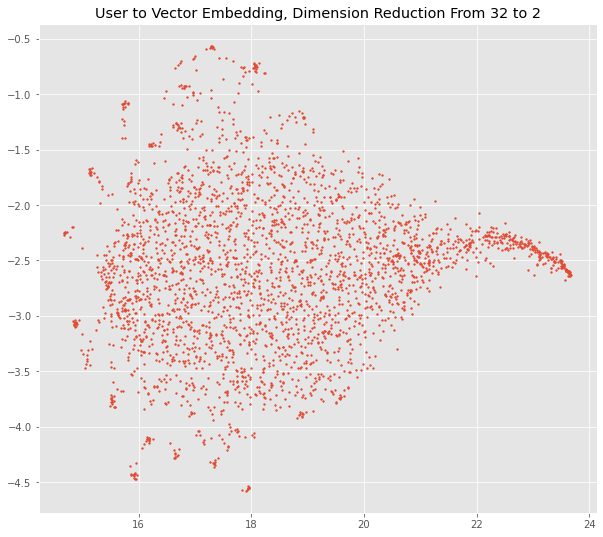

In [10]:
import umap
import matplotlib.pyplot as plt
%matplotlib inline

cluster_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0, n_components=2, random_state=42).fit_transform(X[:3000])

plt.style.use('ggplot')
plt.figure(figsize=(10,9))
plt.title('User to Vector Embedding, Dimension Reduction From 32 to 2')
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')

In [ ]:
train_order_size_dis = train_order.groupby('days_since_prior_order').agg({'days_since_prior_order': 'size'})
#train_order_size_dis.hist(color='red')
test_order_size_dis = test_order.groupby('days_since_prior_order').agg({'days_since_prior_order': 'size'})
#test_order_size_dis.hist(color='green')

In [ ]:
a = [None] * 206210
for i in range(len(order_df.index)):
  a[order_df['user_id'][i]] = 1


In [ ]:
len(a)

206210

In [ ]:
for i in range(len(a)):
  if a[i] != 1:
    print(i)

0
